In [1]:
import ROOT
import matplotlib.pyplot as plt
import numpy as np

Welcome to JupyROOT 6.22/09


In [73]:
folder_path = '/sdf/group/neutrino/sfogarty/ND_prototype_files/MC/input_spectra/ROOT/'
file_name = 'Cobalt_60.root'
file_path = folder_path + file_name 
root_file = ROOT.TFile.Open(file_path,"READ")

# Get the TGraph object from the file
graph = root_file.Get("Gammas")

nbins = 100
print('nbins = ', nbins)
nPoints = graph.GetN()
print('Number of points in graph = ', nPoints)
x = np.array(graph.GetX())
y = np.array(graph.GetY())
binsize = (x[nPoints-1] - x[0])/nbins
print('Bin size = ', binsize, ' keV')
print('x range = ', x[-1] - x[0])

i = 0
y_norm = y/np.sum(y)
x_rebin = []
y_rebin = []
go = True
while go:
    try:
        new_x = (x[i] + x[i+1] + x[i+2])/3
        new_y = y_norm[i] + y_norm[i+1] + y_norm[i+2]
        #new_x = np.mean(x[i] + x[i+1] + x[i+2] + x[i+3])
        #new_y = y_norm[i] + y_norm[i+1] + y_norm[i+2] + y_norm[i+3]
        x_rebin.append(new_x)
        y_rebin.append(new_y)
    except:
        print('Reached end of array, breaking out of loop.')
        go = False
    i = i+3
    

nbins =  100
Number of points in graph =  2755
Bin size =  27.54  keV
x range =  2754.0
Reached end of array, breaking out of loop.


In [74]:
import os
filepath_txt = 'Cobalt_60_gammas.mac'
#if os.path.exists(filepath_txt):
#    raise Exception('Output file '+ str(filepath_txt) + ' already exists.')
f = open(filepath_txt, "w+")
f.write('/edep/random/timeRandomSeed\n')
f.write('/edep/gdml/read /sdf/home/s/sfogarty/Desktop/LArTPC_sim/geometries/Module0.gdml\n')
f.write('/edep/hitLength TPCActive_shape 0.00001 mm\n')
f.write('/process/eLoss/StepFunction 0.2 0.001  mm\n')
f.write('/edep/update\n')
f.write('/gps/pos/type Volume\n')
f.write('/gps/pos/shape Para\n')
f.write('/gps/pos/centre 0.0 -22 0.0 cm\n')
f.write('/gps/pos/halfx 30.2723 cm\n')
f.write('/gps/pos/halfy 62.0543 cm\n')
f.write('/gps/pos/halfz 31.0163 cm\n')
f.write('/gps/ang/type iso\n')
f.write('/gps/particle gamma\n')
f.write('/gps/ene/type User\n')
f.write('/gps/hist/type energy\n')

for i in range(len(x_rebin)):
    f.write('/gps/hist/point '+str("%.6f" % (x_rebin[i]*1e-3))+' '+str("%.6f" % y_rebin[i]) + '\n')

#f.write('/gps/hist/inter Lin')
f.close()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
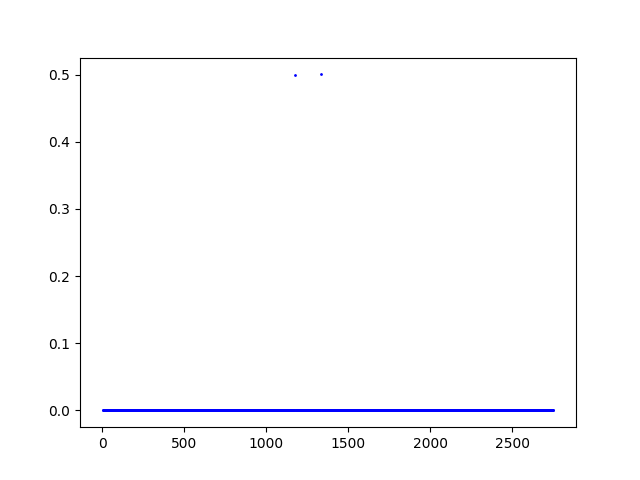

In [75]:
%matplotlib widget
plt.plot(x_rebin, y_rebin, 'bo',markersize=1)
#plt.plot(x_zeros, y_zeros, 'ro',markersize=1)

In [51]:
len(x_rebin)

188

In [10]:
start_energy = 0.200
end_energy = 5.0
binsize = (end_energy - start_energy)/100
energies = np.arange(start_energy, end_energy+binsize, binsize)
weights = 1/len(energies)
print(binsize)

0.048


In [11]:
import os
filepath_txt = '/sdf/group/neutrino/sfogarty/ND_prototype_files/MC/module-0/edep-sim/macros/flat_beta_energy_distribution_5MeV.mac'
#if os.path.exists(filepath_txt):
#    raise Exception('Output file '+ str(filepath_txt) + ' already exists.')
f = open(filepath_txt, "w+")
f.write('/edep/random/timeRandomSeed\n')
f.write('/edep/gdml/read /sdf/home/s/sfogarty/Desktop/LArTPC_sim/geometries/Module0.gdml\n')
f.write('/edep/hitLength TPCActive_shape 0.00001 mm\n')
f.write('/process/eLoss/StepFunction 0.2 0.001  mm\n')
f.write('/edep/update\n')
f.write('/gps/pos/type Volume\n')
f.write('/gps/pos/shape Para\n')
f.write('/gps/pos/centre 0.0 -22 0.0 cm\n')
f.write('/gps/pos/halfx 30.2723 cm\n')
f.write('/gps/pos/halfy 62.0543 cm\n')
f.write('/gps/pos/halfz 31.0163 cm\n')
f.write('/gps/ang/type iso\n')
f.write('/gps/particle e-\n')
f.write('/gps/ene/type User\n')
f.write('/gps/hist/type energy\n')

for i in range(len(energies)):
    f.write('/gps/hist/point '+str("%.6f" % (energies[i]))+' '+str("%.6f" % weights) + '\n')

#f.write('/gps/hist/inter Lin')
f.close()